<a href="https://colab.research.google.com/github/lintangiqhtiar/rec-sys-based-llm/blob/main/fix_Two_Step_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df=pd.read_csv('/content/prepro_sentiment_analysis.csv')

In [4]:
df

,Review,label,confidence
0,saya tidak menemukan menu lanjutan untuk perpa...,Neutral,0.999639
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940
2,sangat bagus dan proses nya cepat,Positive,0.999757
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813
...,...,...,...
33258,mantaps,Positive,0.999678
33259,lanjut perpanjangan sim secara manual lewat on...,Neutral,0.998676
33260,kenapa katanya layanan belum tersedia ada masa...,Negative,0.987648
33261,bagus beberapa kali buat lancar,Positive,0.999573


In [5]:
#membuat dataset yang berisi review dengan label negative sajA
df_neg = df.copy()
df_neg = df[df['label'] == 'Negative']

In [6]:
df_neg.head()

,Review,label,confidence
1,harusnya proses itu setelah data dikirim baru ...,Negative,0.988940
3,ini aplikasinya kenapa sihkok mau buat sim bar...,Negative,0.994384
4,aplikasi payah duit sudah dibayar tapi muncul ...,Negative,0.999813
9,verifikasi gagal,Negative,0.999831
10,sampah,Negative,0.999882


In [7]:
#Tokenisasi
def tokenize(text):
    # Check if the input is a string, convert to string if not
    if not isinstance(text, str):
        text = str(text)
    return word_tokenize(text)

df_neg['tokenized_review'] = df_neg['Review'].apply(tokenize)

<ipython-input-7-c0faf2cd862c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['tokenized_review'] = df_neg['Review'].apply(tokenize)


In [8]:
# Stop words Bahasa Indonesia
indonesian_stopwords = set(stopwords.words('indonesian'))
custom_stopwords = {"yang", "dengan", "untuk", "dan", "di", "ke", "pada", "ini", "itu", "ada", 'sih', 'kok', 'sihkok','wkwk', 'eh', 'deh', 'nya'}
indonesian_stopwords.update(custom_stopwords)

def remove_stopwords(text):
  return [word for word in text if word not in indonesian_stopwords]

df_neg['stopword_review'] = df_neg['tokenized_review'].apply(remove_stopwords)

<ipython-input-8-3f422920910a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['stopword_review'] = df_neg['tokenized_review'].apply(remove_stopwords)


In [9]:
# Membuat stemmer (lemmatization Bahasa Indonesia)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lematize(text):
  return [stemmer.stem(word) for word in text]

df_neg['lemmatized_review'] = df_neg['stopword_review'].apply(lematize)

<ipython-input-9-0f98dac7293b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['lemmatized_review'] = df_neg['stopword_review'].apply(lematize)


In [10]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [11]:
# Membuat bigram
bigram = Phrases(df_neg['lemmatized_review'], min_count=2, threshold=10)  # min_count: frekuensi minimum bigram
bigram_mod = Phraser(bigram)

# Menerapkan bigram pada dokumen
processed_docs_bigram = [bigram_mod[doc] for doc in df_neg['lemmatized_review']]

# Melihat hasil preprocessing
print(processed_docs_bigram)

[['proses', 'data', 'kirim', 'validasi', 'data', 'data', 'bayar', 'nama', 'ampo', 'anggap', 'gagal', '3', 'kali', 'rugi', 'puluh_ribu', 'pakai', 'bank_bank', 'negara_indonesia', 'bank', 'tekor', '50', 'ribu'], ['aplikasi', 'sim', 'tulis', 'layan', 'tersedialayanan', 'pilih', 'kembang', 'bagus', 'aplikasi', 'memudahkanini'], ['aplikasi', 'payah', 'duit', 'bayar', 'muncul_notifikasi', 'tolak_alas', 'foto', 'kartu_tanda', 'duduk', 'sim', 'jelasmana', 'uplod', 'foto', 'gb', 'duit', 'kembali_potong', 'ahhhhh', 'verifikasi', 'bayar', 'sesuai', 'suruh', 'bayar', 'verifikasi', 'udah', 'suruh', 'bayar', 'rugi', 'gilir', 'terbit', 'muncul', 'alas', 'foto', 'ha'], ['verifikasi', 'gagal'], ['sampah'], ['sumber_daya', 'manusia', 'kompeten', 'tangan', 'sim', 'online', 'ya', 'wajib', 'sim', 'panjang', 'sulit', 'data', 'sesuai', 'sim', 'kartu_tanda', 'duduk', 'foto_blur', 'blur', 'kaya', 'bayang', 'kaya', 'ya', 'cetak', 'bayar', 'data', 'sesuai'], ['sempurna'], ['sim', 'ya', 'aplikasi'], ['daftar', 'n

In [12]:
from gensim import corpora, models

# Membuat dictionary dan corpus
dictionary = corpora.Dictionary(processed_docs_bigram)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs_bigram]

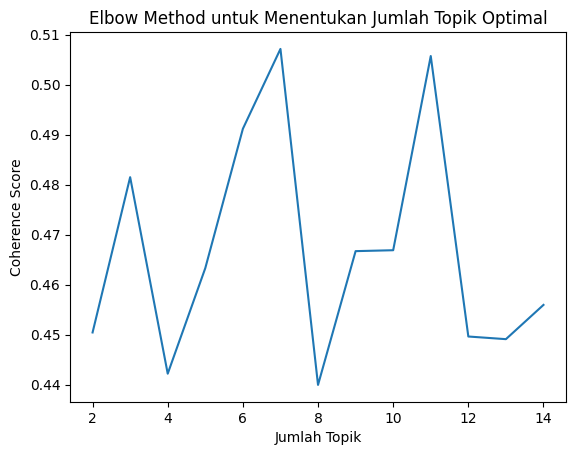

In [13]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Fungsi untuk menghitung coherence score untuk berbagai jumlah topik
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Menentukan parameter
start = 2
limit = 15
step = 1

# Hitung coherence score
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=processed_docs_bigram,
    start=start, limit=limit, step=step
)

# Plot coherence score
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.title("Elbow Method untuk Menentukan Jumlah Topik Optimal")
plt.show()


In [18]:
optimal_topics = 7
lda_model_optimal = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_topics, passes=15)

# Menampilkan topik
for idx, topic in lda_model_optimal.print_topics(-1):
    print(f"Topik {idx}: {topic}")

Topik 0: 0.158*"aplikasi" + 0.019*"pakai" + 0.017*"guna" + 0.017*"ribet" + 0.016*"unduh" + 0.016*"mudah" + 0.015*"kembang" + 0.014*"susah" + 0.011*"fungsi" + 0.011*"buruk"
Topik 1: 0.133*"gagal" + 0.108*"verifikasi" + 0.068*"duduk" + 0.068*"kartu_tanda" + 0.030*"foto" + 0.028*"susah" + 0.026*"kali" + 0.024*"coba" + 0.018*"verifikasi_elektonik" + 0.017*"verifikasi_wajah"
Topik 2: 0.079*"masuk" + 0.034*"login" + 0.024*"kali" + 0.023*"aplikasi" + 0.023*"sms" + 0.022*"otp" + 0.019*"email" + 0.018*"salah" + 0.018*"pulsa" + 0.016*"masuk_nomor"
Topik 3: 0.052*"ya" + 0.030*"sim" + 0.025*"layan_sedia" + 0.019*"min" + 0.019*"error" + 0.018*"pilih" + 0.017*"proses" + 0.016*"pas" + 0.015*"kirim" + 0.011*"muncul"
Topik 4: 0.043*"daftar" + 0.037*"sim" + 0.030*"aplikasi" + 0.029*"ya" + 0.016*"buka" + 0.016*"coba" + 0.012*"panjang" + 0.012*"nomor" + 0.011*"data" + 0.010*"bantu"
Topik 5: 0.034*"bayar" + 0.029*"aplikasi" + 0.017*"indonesia" + 0.017*"tes" + 0.014*"online" + 0.013*"tes_sehat" + 0.012*"tes

In [19]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_optimal, texts=processed_docs_bigram, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5114601437642422
